In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

In [11]:
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
import mpl_finance as mpf

import seaborn as sns

# time
import datetime as datetime

# talib
import talib
from pandas_datareader._utils import RemoteDataError
%matplotlib inline

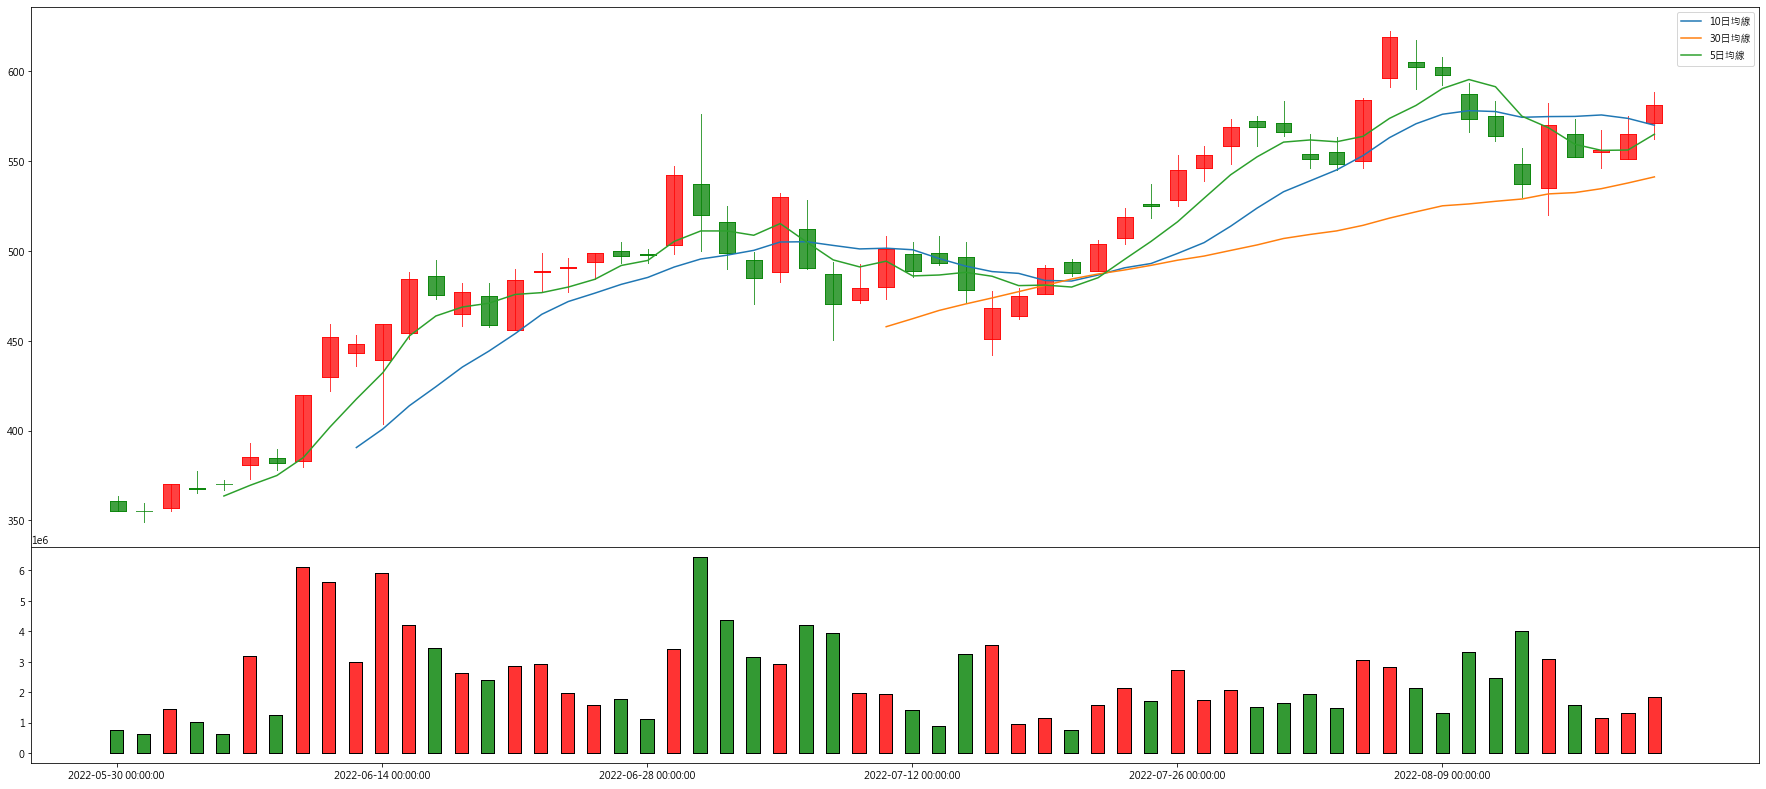

In [15]:
def plotStock(sid, start, end):
    try:
        df = pdr.DataReader(f'{sid}.TW', 'yahoo', start=start, end=end)
    except RemoteDataError as exp:
        df = pdr.DataReader(f'{sid}.TWO', 'yahoo', start=start, end=end)
    sma_10 = talib.SMA(np.array(df['Close']), 10)
    sma_5 = talib.SMA(np.array(df['Close']), 5)
    sma_30 = talib.SMA(np.array(df['Close']), 30)

    fig = plt.figure(figsize=(24, 15))
    ax = fig.add_axes([0, 0.2, 1, 0.5])
    ax2 = fig.add_axes([0, 0, 1, 0.2])
    ax.plot(grid='True')
    # 使用 set_xticklabels來畫股票棒子 from talib
    ax.set_xticks(range(0, len(df.index), 10))
    ax.set_xticklabels(df.index[::10])
    mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'],
                          df['Low'], width=0.6, colorup='r', colordown='g',
                          alpha=0.75)
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
    ax.plot(sma_10, label='10日均線')
    ax.plot(sma_30, label='30日均線')
    ax.plot(sma_5, label='5日均線')
    # 成交量
    mpf.volume_overlay(ax2, df['Open'], df['Close'], df['Volume'],
                       colorup='r', colordown='g', width=0.5, alpha=0.8)
    ax2.set_xticks(range(0, len(df.index), 10))
    ax2.set_xticklabels(df.index[::10])

    ax.legend()
    return df


start = datetime.datetime(2022, 5, 30)  # from datatime
end = datetime.datetime(2022, 8, 20)  # from datatime
sid = 6446
ans = plotStock(sid, start, end)